# Regression of Little Kluane MB Data from EMY

In [82]:
import os 
import numpy as np 
import scipy.signal as signal
from scipy import linalg as LA
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [2]:
MB     = np.load('../Data/surgio_withdeb_NMB.npy') # annual mass balance data from EMY
ZZ     = np.load('../Data/surgio_Zs.npy')          # Elevation used by EMY

# Take temporal average of mb data
MB     = np.mean(MB,axis=0)                        # Annual mean mass balance

The regression won't be able to handel `nans` so lets remove all the `nan`s from the raster and flatten it to a column vector: 

Note we also remove an outlier which I have no idea why it's here...

In [17]:
z = ZZ[(~np.isnan(MB)) & ~(MB < -10)]
b = MB[(~np.isnan(MB)) & ~(MB < -10)]

First things first we need to idenitfy the approximate location of the of ELA. Interpolation would be the sensible way to do this, but since our end goal is somekind of regression I'm going to hold off from doing this. 

Instead I will the find the 25 closest values to a zero mass balance and take the mean of their corresponding Elevations. For information on how to find the $N$ smallest elements (and their indexes) in an array see [here](https://kanoki.org/2020/01/14/find-k-smallest-and-largest-values-and-its-indices-in-a-numpy-array/). 

In [68]:
z_ELA = np.mean(z[np.argpartition(np.abs(b),25)[:25]])

Lets take a look at our data and the approximate location of the ELA:

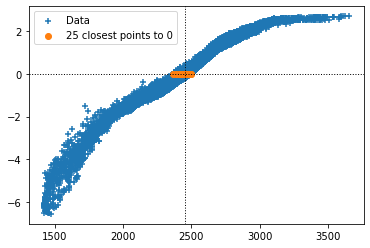

In [72]:
plt.scatter(z,b, marker="+",label='Data')
plt.scatter(z[np.argpartition(np.abs(b),25)[:25]],b[np.argpartition(np.abs(b),25)[:25]], marker="o", label='25 closest points to 0')

plt.axhline(0,ls=':', c='k', lw=1)
plt.axvline(z_ELA,ls=':', c='k', lw=1)

plt.legend()

Okay, that seems good enough for me! Lets transform our coordinate relative to Z_ela now:

In [74]:
z_R = z - z_ELA

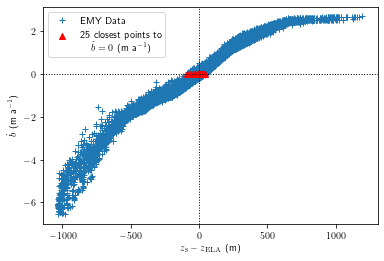

In [110]:
plt.plot(z_R,b,'+', label='EMY Data',zorder=0)

plt.scatter(z_R[np.argpartition(np.abs(b),25)[:25]],
            b[np.argpartition(np.abs(b),25)[:25]], 
            c='r', 
            marker="^", 
            label=r'\begin{center} 25 closest points to\\ $\dot b = 0$ (m a$^{-1}$) \end{center}',
           zorder=2)

plt.axhline(0,ls=':', c='k', lw=1)
plt.axvline(0,ls=':', c='k', lw=1)

plt.ylabel('$\dot b$ (m a$^{-1}$)');
plt.xlabel('$z_{\\rm s} - z_{\\rm ELA}$ (m)');

plt.legend()

plt.savefig('../plots/mb_v_transfromed_z.png',dpi=300, bbox_inches='tight',facecolor="w")

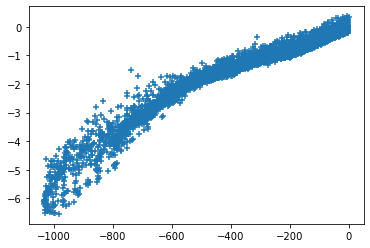

In [80]:
plt.scatter(z_R[z_R < 0],b[z_R < 0], marker="+",label='Data')

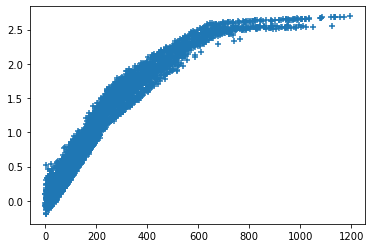

In [81]:
plt.scatter(z_R[z_R > 0],b[z_R > 0], marker="+",label='Data')